# This notebook shows how to do Perceptron modeling on breast cancer dataset

In [13]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import plot_confusion_matrix

In [14]:
np.random.seed(42)

### Load Breast cancer dataset

In [15]:
breast = datasets.load_breast_cancer()
X = breast.data
Y = breast.target
class_names = breast.target_names
X.shape, Y.shape, class_names

((569, 30), (569,), array(['malignant', 'benign'], dtype='<U9'))

In [5]:
scaler = StandardScaler()
X_rescaled = scaler.fit_transform(X)

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X_rescaled, Y, test_size=0.2, random_state=0)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((455, 30), (455,), (114, 30), (114,))

### Build a perceptron model using sklearn

In [7]:
model = Perceptron(tol=1e-3, random_state=0).fit(X_train, Y_train)

print('Accuracy of perceptron on training set: {:.2f}'.format(model.score(X_train, Y_train)))

print('Accuracy of perceptron on test set: {:.2f}'.format(model.score(X_test, Y_test)))

Accuracy of perceptron on training set: 0.98
Accuracy of perceptron on test set: 0.93


Confusion matrix, without normalization
[[45  2]
 [ 6 61]]
Normalized confusion matrix
[[0.96 0.04]
 [0.09 0.91]]


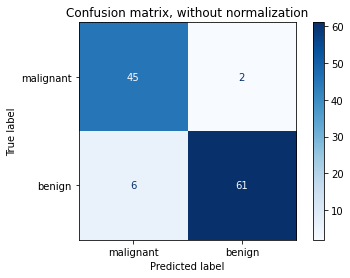

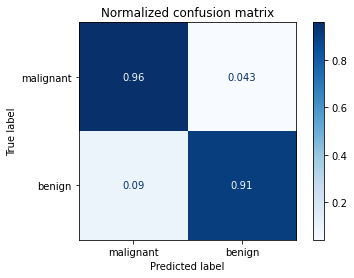

In [8]:
# this code is adopted from this example:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, Y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Implement perceptron model from scratch

In [9]:
def activation(val):
    return 1 if val >= 0 else 0

def predict_with_perceptron(inputs, weights):
        weighted_sum = np.dot(inputs, weights[1:]) + weights[0]
        return activation(weighted_sum)
    
def train_perceptron(X,Y,eta,max_epochs):
    # initialize the weights and bias to zeros
    w = np.zeros(len(X[0])+1)
    
    # setup error tracking variables
    SSE_vect = np.zeros(max_epochs)
    
    for m in range(max_epochs):
        SSE = 0.0
        
        # for each observation (stochastic gradient descent)
        for i in range(Y.shape[0]):
            y_hat = predict_with_perceptron(X[i], w)
            error = Y[i] - y_hat
            SSE += error**2
            for j in range(len(w)):
                if j == 0:
                    w[j] = w[j] + eta * (Y[i] - y_hat)
                else:
                    w[j] = w[j] + eta * (Y[i] - y_hat) * X[i][j-1]
        
        SSE_vect[m] = SSE
    
    #print(SSE_vect)
    #print(w)
    return w

weights = train_perceptron(X_train,Y_train,.1,100)

In [10]:
def score(inputs, w):
    correct = 0
    incorrect = 0
    for i in range(len(X_test)):
        y_hat = predict_with_perceptron(X_test[i], w)
        if y_hat == Y_test[i]:
            correct += 1
        else:
            incorrect += 1
    return correct/(correct + incorrect)

print('Accuracy of perceptron on test set: {:.3f}'.format(score(X_test, weights)))

Accuracy of perceptron on test set: 0.947


In [11]:
# did we actually train the model? do randomly initialized weights actually give us similar performance?
weights = np.zeros(len(X[0])+1)
print('Accuracy of perceptron on test set using random weights: {:.3f}'.format(score(X_test, weights)))
# this model performs similar to a random gues; conclusion: fitting the perceptron model resulted in a model with improved performance

Accuracy of perceptron on test set using random weights: 0.588
